## Logistic Regression

Logistic regression is a statistical method used for binary classification problems, where the goal is to predict one of two possible outcomes. It models the probability that a given input belongs to a particular category.

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
train = pd.read_csv('titanic_train.csv')

In [3]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


### EDA - 

In [5]:
train.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


<Axes: >

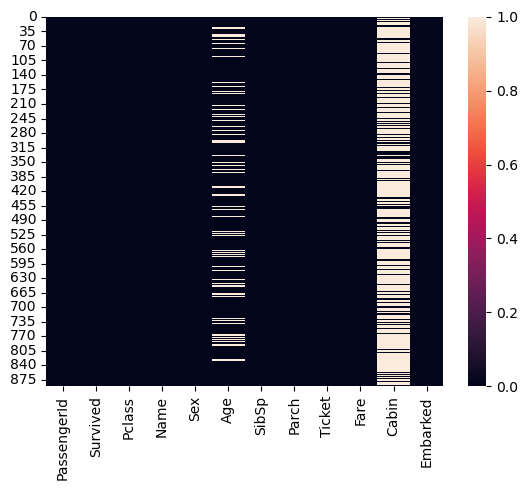

In [6]:
sns.heatmap(train.isnull())

<Axes: >

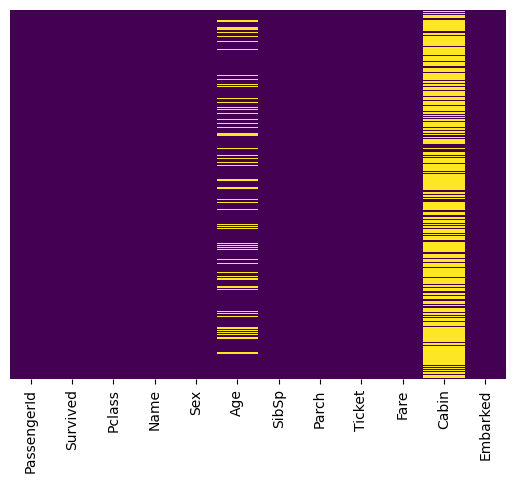

In [7]:
sns.heatmap(train.isnull(), yticklabels=False, cbar=False, cmap='viridis')

#### Cabin data is missing a lot 
#### Age data is missing nearly 20-30 %

In [8]:
sns.set_style("whitegrid")

<Axes: xlabel='Survived', ylabel='count'>

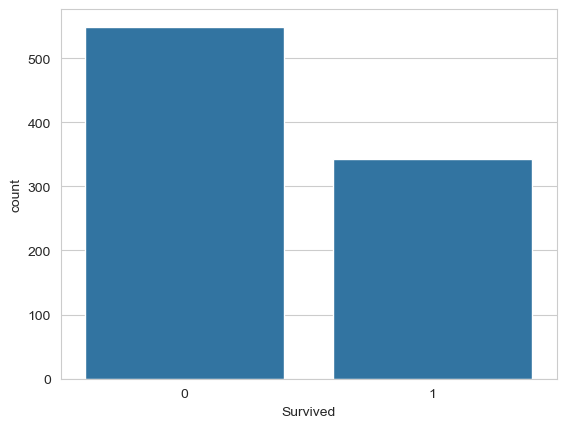

In [9]:
# who survived and who didn't
sns.countplot(x='Survived', data=train, )

<Axes: xlabel='Survived', ylabel='count'>

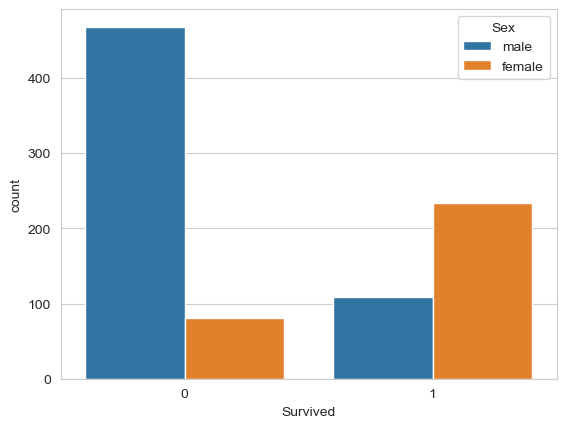

In [10]:
# Gender
sns.countplot(x='Survived', data=train, hue='Sex')

<Axes: xlabel='Survived', ylabel='count'>

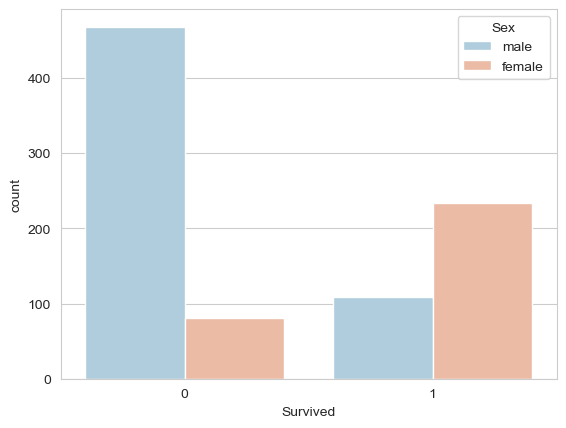

In [11]:
sns.countplot(x='Survived', data=train, hue='Sex', palette="RdBu_r")

<Axes: xlabel='Survived', ylabel='count'>

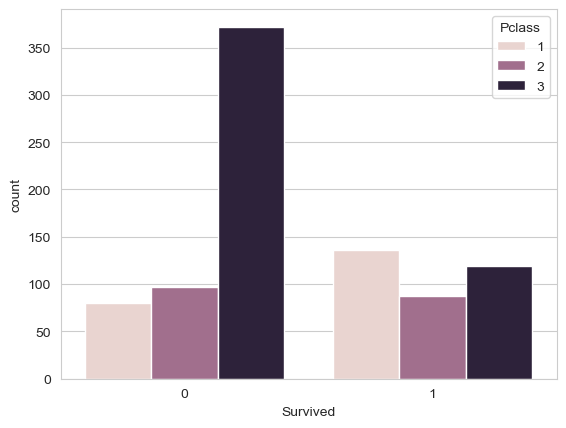

In [12]:
# P Class
sns.countplot(x='Survived', data=train, hue='Pclass',)

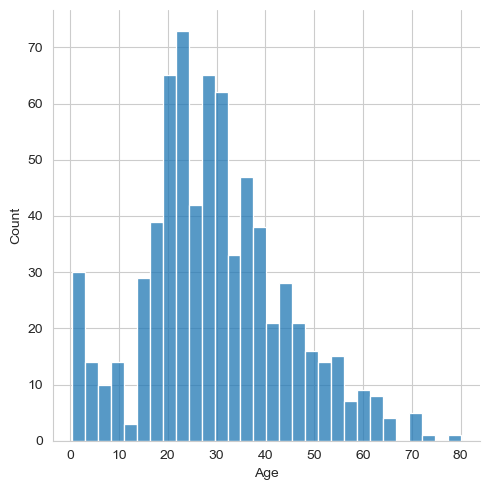

In [13]:
# Age
sns.displot(train['Age'].dropna(), bins=30)

<Axes: ylabel='Frequency'>

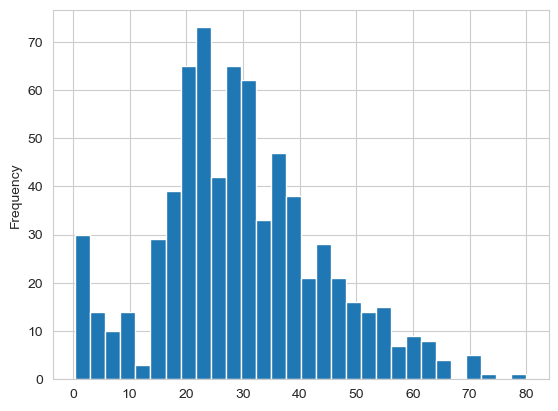

In [14]:
train['Age'].plot.hist(bins=30)

In [15]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


<Axes: xlabel='SibSp', ylabel='count'>

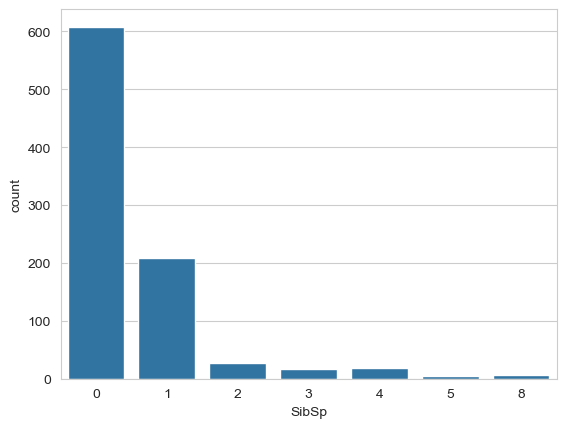

In [16]:
sns.countplot(x="SibSp", data=train)

In [17]:
train['Fare']

0       7.2500
1      71.2833
2       7.9250
3      53.1000
4       8.0500
        ...   
886    13.0000
887    30.0000
888    23.4500
889    30.0000
890     7.7500
Name: Fare, Length: 891, dtype: float64

<Axes: >

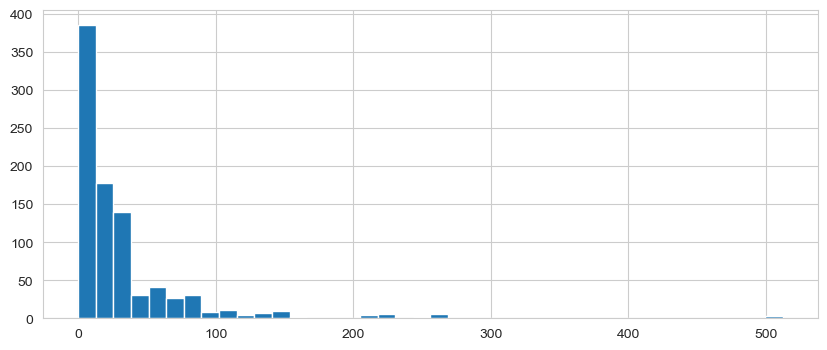

In [18]:
train['Fare'].hist(bins=40, figsize=(10,4))

In [19]:
# Interactive Plots
import cufflinks as cf
cf.go_offline()

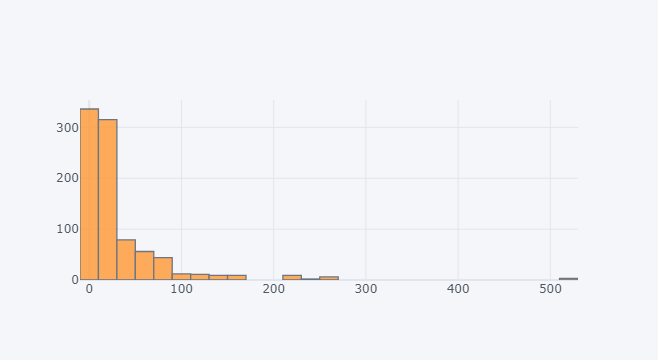

In [20]:
train['Fare'].iplot(kind="hist", bins=50)

___
## Data Cleaning
We want to fill in missing age data instead of just dropping the missing age data rows. One way to do this is by filling in the mean age of all the passengers (imputation).

<Axes: xlabel='Pclass', ylabel='Age'>

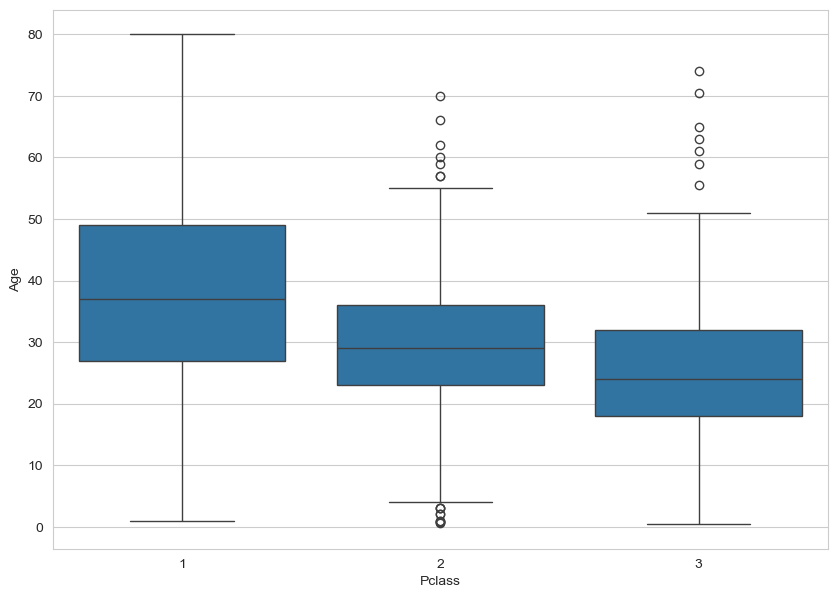

In [21]:
plt.figure(figsize=(10,7))
sns.boxplot(x="Pclass", y='Age', data=train)

**We can see the wealthier passengers in the higher classes tend to be older, which makes sense. We'll use these average age values to impute based on Pclass for Age.**

In [22]:
train[train['Pclass'] == 1]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S
23,24,1,1,"Sloper, Mr. William Thompson",male,28.0,0,0,113788,35.5000,A6,S
...,...,...,...,...,...,...,...,...,...,...,...,...
871,872,1,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",female,47.0,1,1,11751,52.5542,D35,S
872,873,0,1,"Carlsson, Mr. Frans Olof",male,33.0,0,0,695,5.0000,B51 B53 B55,S
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S


In [23]:
# average age of the first class passenger 
train[train['Pclass'] == 1]['Age'].mean()

38.233440860215055

In [24]:
# average age of the second class passenger 
train[train['Pclass'] == 2]['Age'].mean()

29.87763005780347

In [25]:
# average age of the third class passenger 
train[train['Pclass'] == 3]['Age'].mean()

25.14061971830986

In [26]:
def impute_age(cols):
    age = cols.iloc[0]
    pclass = cols.iloc[1]
    
    # if age is not a null then simply return the age
    if not pd.isnull(age):
        return age
        
    # if age is null then return the age according to PClass
    else:
        if pclass==1:
            return 38
        elif pclass==2:
            return 30
        else:
            return 25

In [27]:
pd.isnull(4)

False

In [28]:
pd.isnull(np.NaN)

True

In [29]:
train[['Age', 'Pclass']]

,Age,Pclass
0,22.0,3
1,38.0,1
2,26.0,3
3,35.0,1
4,35.0,3
...,...,...
886,27.0,2
887,19.0,1
888,NaN,3
889,26.0,1


In [30]:
train[['Age', 'Pclass']].isnull().sum()

Age       177
Pclass      0
dtype: int64

In [31]:
train[['Age', 'Pclass']].apply(impute_age, axis=1)

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888    25.0
889    26.0
890    32.0
Length: 891, dtype: float64

In [32]:
train['Age'] = train[['Age', 'Pclass']].apply(impute_age, axis=1)

In [33]:
train['Age']

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888    25.0
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

In [34]:
train['Age'].isnull().sum()

0

<Axes: >

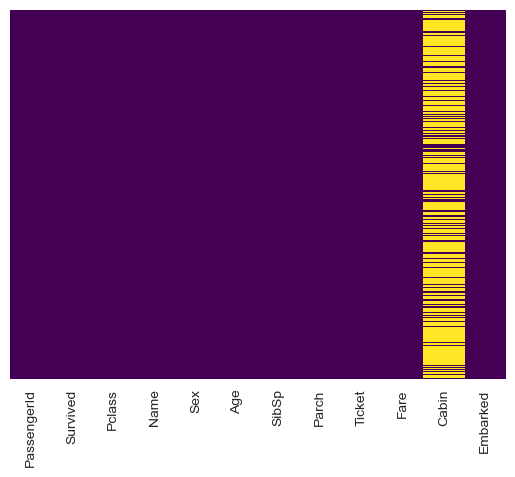

In [35]:
sns.heatmap(train.isnull(), yticklabels=False, cbar=False, cmap='viridis')

**Now there is no NaN value in Age column**

In [36]:
# There are lots of NaN value in Cabin
train.drop('Cabin', axis=1, inplace=True)

In [37]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [38]:
train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

In [39]:
train.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

In [40]:
# rows where NaN value is present
train[train.isna().any(axis=1)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,NaN


In [41]:
# drop all the rows which contains NaN values
train.dropna(inplace=True)

In [42]:
# rows where NaN value is present
train[train.isna().any(axis=1)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked


In [43]:
train.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

<Axes: >

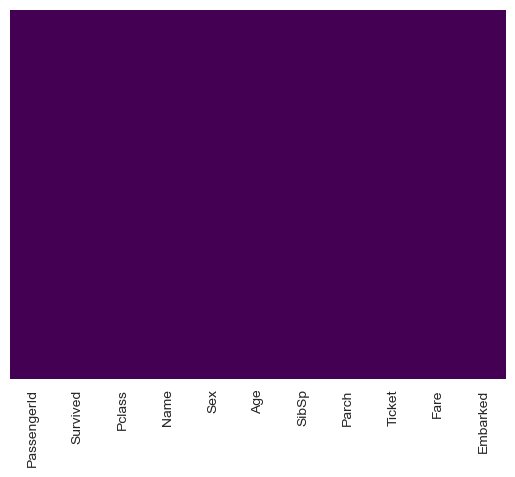

In [44]:
sns.heatmap(train.isnull(), yticklabels=False, cbar=False ,cmap='viridis')

**Now nothing is missing**

---
## Converting Categorical Features 

We'll need to convert categorical features to dummy variables using pandas! Otherwise our machine learning algorithm won't be able to directly take in those features as inputs.

In [45]:
train.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C


In [46]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 889 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    object 
 5   Age          889 non-null    float64
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Ticket       889 non-null    object 
 9   Fare         889 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 83.3+ KB


In [47]:
pd.get_dummies(train["Sex"], )

,female,male
0,False,True
1,True,False
2,True,False
3,True,False
4,False,True
...,...,...
886,False,True
887,True,False
888,True,False
889,False,True


In [48]:
pd.get_dummies(train["Sex"], )

,female,male
0,False,True
1,True,False
2,True,False
3,True,False
4,False,True
...,...,...
886,False,True
887,True,False
888,True,False
889,False,True


In [49]:
pd.get_dummies(train["Sex"], drop_first=True)

,male
0,True
1,False
2,False
3,False
4,True
...,...
886,True
887,False
888,False
889,True


In [50]:
pd.get_dummies(train["Sex"], drop_first=True).astype(int)

,male
0,1
1,0
2,0
3,0
4,1
...,...
886,1
887,0
888,0
889,1


In [51]:
# Converting categorical to numerical data for the Sex column
sex = pd.get_dummies(train["Sex"], drop_first=True).astype(int)
sex

,male
0,1
1,0
2,0
3,0
4,1
...,...
886,1
887,0
888,0
889,1


In [52]:
# Converting categorical to numerical data for the Embarked column
embark = pd.get_dummies(train['Embarked'], drop_first=True, ).astype(int)
embark

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1
...,...,...
886,0,1
887,0,1
888,0,1
889,0,0


In [53]:
train = pd.concat([train, sex, embark], axis=1)
train.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,0,0


In [54]:
# Drop columns which we are not going to used because they are redundant and doesn't provide some insights
train.drop(['Sex', "Embarked", "Ticket", "Name", "PassengerId"], axis=1, inplace=True)

In [55]:
train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


**Now data is ready for the model!**

# Building a Logistic Regression model

Let's start by splitting our data into a training set and test set

## Train Test Split

In [56]:
train.columns

Index(['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'male', 'Q',
       'S'],
      dtype='object')

In [57]:
X = train[['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'male', 'Q', 'S']]
X.head(2)

,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,3,22.0,1,0,7.2500,1,0,1
1,1,38.0,1,0,71.2833,0,0,0


In [58]:
y = train["Survived"]
y.head(2)

0    0
1    1
Name: Survived, dtype: int64

In [59]:
# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.3, random_state=101)

## Training and Predicting

In [60]:
logmodel = LogisticRegression(max_iter=1000)

In [61]:
# Training
logmodel.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [62]:
# Predictions
predictions = logmodel.predict(X_test)

In [63]:
predictions

array([0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1,

## Evaluation

We can check precision, recall, f1-score using classification report!

In [64]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.82      0.86      0.84       384
           1       0.76      0.70      0.73       239

    accuracy                           0.80       623
   macro avg       0.79      0.78      0.78       623
weighted avg       0.80      0.80      0.80       623



## Class 0 (Not Survived):

- Precision: 0.82 (82% of instances predicted as class 0 are correct)
- Recall: 0.86 (86% of actual class 0 instances are correctly identified)
- F1-score: 0.84 (harmonic mean of precision and recall)
- Support: 384 (number of actual instances of class 0)

## Class 1 (Survived):

- Precision: 0.76 (76% of instances predicted as class 1 are correct)
- Recall: 0.70 (70% of actual class 1 instances are correctly identified)
- F1-score: 0.73 (harmonic mean of precision and recall)
- Support: 239 (number of actual instances of class 1)

### Accuracy: 
- 0.80 (Overall, 80% of the predictions are correct)

### Macro Average:

- Precision: 0.79 (average precision for both classes)
- Recall: 0.78 (average recall for both classes)
- F1-score: 0.78 (average F1-score for both classes)
- Note: Macro average gives equal weight to each class.

### Weighted Average:

- Precision: 0.80 (average precision, weighted by support of each class)
- Recall: 0.80 (average recall, weighted by support of each class)
- F1-score: 0.80 (average F1-score, weighted by support of each class)
- Note: Weighted average accounts for the class imbalance by considering the support of each class.

In [65]:
print(confusion_matrix(y_test, predictions))

[[330  54]
 [ 72 167]]


*   **True Negatives (TN)**: 330
    
    *   Instances where the actual class is 0 (negative) and the model correctly predicted them as 0.
*   **False Positives (FP)**: 54
    
    *   Instances where the actual class is 0 (negative) but the model incorrectly predicted them as 1 (positive).
*   **False Negatives (FN)**: 72
    
    *   Instances where the actual class is 1 (positive) but the model incorrectly predicted them as 0 (negative).
*   **True Positives (TP)**: 167
    
    *   Instances where the actual class is 1 (positive) and the model correctly predicted them as 1.
